<table style="width:100%;font-size:11pt">
        <tr style="width:100%;font-size:11pt">
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD; width:35%"><center>Asignatura</center>
            </td>
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD"><center>Datos del alumno</center>
            </td>
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD; width:10%"><center>Fecha</center>
            </td>
        </tr>
        <tr style="width:100%;font-size:11pt">
            <td rowspan="2" style="border: 1px #0098cd solid"><center><b>Técnicas Multivaraintes y Machine Learning</b></center>
            </td>
            <td style="border: 1px #0098cd solid; text-align:left">Apellidos: Gómez del Hierro</td>
            <td rowspan="2" style="border: 1px #0098cd solid"><center>20/05/2024</center>
            </td>
        </tr>
        <tr>
            <td style="border: 1px #0098cd solid; text-align:left">Nombres: Gonzalo Miguel
            </td>
        </tr>
            <tr style="width:100%;font-size:11pt">
            <td style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD"><center>Actividad</center>
            </td>
            <td colspan="2" style="border: 1px #0098cd solid; text-align:left">Laboratorio: Resolver un problema de regresión
            </td>
        </tr>    
</table>

In [239]:
# importamos librerías y funciones para usar durante el desarrollo de la práctica
import sklearn
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [216]:
semilla = 72224274

In [217]:
# definimos una lista con los dígitos de la semilla
digitos = [int(str(semilla)[i]) for i in range(len(str(semilla)))]

In [218]:
# definimos las variables de entrada para crear la colección de datos según se indica
n_samples = 200 + 10 * digitos[0]
n_features = 10 +  digitos[1] + digitos[2]
n_informative = 10 + digitos[1]
noise = 10 * digitos[3]

In [219]:
# generamos la colección de datos
X, y = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative,
                      bias=2, noise=noise, random_state=semilla, shuffle=False)

In [220]:
# Generamos un dataset apropiado con la info que tenemos
# etiquetas para las n_features variables independientes + la variable independiente
columns = ['x{}'.format(i) for i in range(X.shape[1])]
columns.append('y')

In [221]:
# generamos un dataframe apropiado
df = pd.DataFrame(np.hstack((X,y[:, None])), columns=columns)

In [222]:
# describimos nuestro conjunto de datos con algunas funciones útiles
df

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.315281,-1.284600,0.564583,-0.727306,0.263381,0.017403,-2.332820,1.738110,0.016395,0.733640,-2.004806,-0.969114,-0.623471,1.322573,-451.745047
1,-0.602440,-0.831936,0.693117,-0.427931,1.100620,0.245356,1.559427,-1.025479,1.018934,0.008634,-0.363674,0.331092,0.422991,-2.527868,108.002722
2,0.794278,1.778578,0.552433,1.011247,0.259250,0.009512,-0.757721,0.972232,0.112370,-0.318427,-0.524120,-0.484009,-0.957438,0.724373,29.343925
3,-0.996813,-0.415302,-0.370038,1.650984,-0.188385,-0.176537,0.026197,0.150881,-0.290190,1.181442,-0.100682,-0.043348,1.309407,-0.927046,64.951889
4,-0.679804,1.217816,-0.259442,-1.609947,0.669880,2.281330,-0.939036,1.601044,-1.189196,0.018630,-0.759211,-1.379096,0.925069,-0.198745,-192.166408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.444094,-1.122727,-0.883724,1.785362,-1.368745,-0.270355,0.766365,2.478700,1.958399,-1.320300,1.714167,0.075454,-0.062392,1.504630,296.593400
266,-0.238318,0.771682,1.776297,-0.638129,-0.565051,-0.185949,1.595666,-0.039494,-0.783031,-0.774059,-0.673031,0.162668,-0.928633,0.129669,41.641172
267,-0.832529,-0.114558,1.164128,-0.743954,0.353762,-0.518621,1.125528,0.561812,0.398975,-0.317631,0.865496,-0.510306,-0.363431,0.972170,32.869988
268,0.084676,-0.584892,0.267026,-2.096889,0.239488,-0.864785,1.345757,0.985853,-0.451914,0.114965,-0.776839,0.428191,-0.757286,-0.789057,-170.486885


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      270 non-null    float64
 1   x1      270 non-null    float64
 2   x2      270 non-null    float64
 3   x3      270 non-null    float64
 4   x4      270 non-null    float64
 5   x5      270 non-null    float64
 6   x6      270 non-null    float64
 7   x7      270 non-null    float64
 8   x8      270 non-null    float64
 9   x9      270 non-null    float64
 10  x10     270 non-null    float64
 11  x11     270 non-null    float64
 12  x12     270 non-null    float64
 13  x13     270 non-null    float64
 14  y       270 non-null    float64
dtypes: float64(15)
memory usage: 31.8 KB


In [224]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,-0.081585,-0.097058,-0.039994,-0.027497,-0.104199,0.050485,-0.020608,0.156459,-0.026023,-0.057981,0.104659,0.054468,-0.053897,-0.053776,3.890033
std,1.035451,0.961844,1.011112,0.991279,0.974281,0.941727,0.998258,1.027737,1.051168,0.983672,0.953814,1.000935,0.974444,0.994570,186.003767
min,-2.754765,-2.642654,-2.682709,-2.641308,-2.299527,-2.441561,-2.878151,-2.964314,-2.884744,-3.208742,-3.095005,-2.304660,-2.698280,-2.637598,-652.962806
25%,-0.768866,-0.814567,-0.768364,-0.729374,-0.786953,-0.559967,-0.658967,-0.505317,-0.722046,-0.705362,-0.554559,-0.711380,-0.676127,-0.702190,-114.400174
50%,-0.119491,-0.106750,-0.048220,-0.051611,-0.139248,0.034343,-0.044463,0.194328,-0.094226,-0.083917,0.089433,0.062546,-0.094599,-0.085843,2.808690
75%,0.614231,0.602314,0.633426,0.637455,0.529370,0.583760,0.687367,0.851522,0.724171,0.560182,0.663197,0.730935,0.576332,0.614925,132.729315
max,3.398219,2.014683,2.840378,2.590261,2.802959,2.419353,2.503547,2.910772,3.446197,2.778748,2.889454,3.034686,2.750551,3.182717,555.141179


In [225]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.315281,-1.284600,0.564583,-0.727306,0.263381,0.017403,-2.332820,1.738110,0.016395,0.733640,-2.004806,-0.969114,-0.623471,1.322573,-451.745047
1,-0.602440,-0.831936,0.693117,-0.427931,1.100620,0.245356,1.559427,-1.025479,1.018934,0.008634,-0.363674,0.331092,0.422991,-2.527868,108.002722
2,0.794278,1.778578,0.552433,1.011247,0.259250,0.009512,-0.757721,0.972232,0.112370,-0.318427,-0.524120,-0.484009,-0.957438,0.724373,29.343925
3,-0.996813,-0.415302,-0.370038,1.650984,-0.188385,-0.176537,0.026197,0.150881,-0.290190,1.181442,-0.100682,-0.043348,1.309407,-0.927046,64.951889
4,-0.679804,1.217816,-0.259442,-1.609947,0.669880,2.281330,-0.939036,1.601044,-1.189196,0.018630,-0.759211,-1.379096,0.925069,-0.198745,-192.166408


In [226]:
df.tail()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
265,0.444094,-1.122727,-0.883724,1.785362,-1.368745,-0.270355,0.766365,2.478700,1.958399,-1.320300,1.714167,0.075454,-0.062392,1.504630,296.593400
266,-0.238318,0.771682,1.776297,-0.638129,-0.565051,-0.185949,1.595666,-0.039494,-0.783031,-0.774059,-0.673031,0.162668,-0.928633,0.129669,41.641172
267,-0.832529,-0.114558,1.164128,-0.743954,0.353762,-0.518621,1.125528,0.561812,0.398975,-0.317631,0.865496,-0.510306,-0.363431,0.972170,32.869988
268,0.084676,-0.584892,0.267026,-2.096889,0.239488,-0.864785,1.345757,0.985853,-0.451914,0.114965,-0.776839,0.428191,-0.757286,-0.789057,-170.486885
269,-0.620912,0.756763,-0.884207,0.233496,-0.589103,-1.274796,-0.403543,0.568941,1.386052,0.006668,-0.091288,1.582465,-0.253343,0.041913,-50.133525


<Axes: >

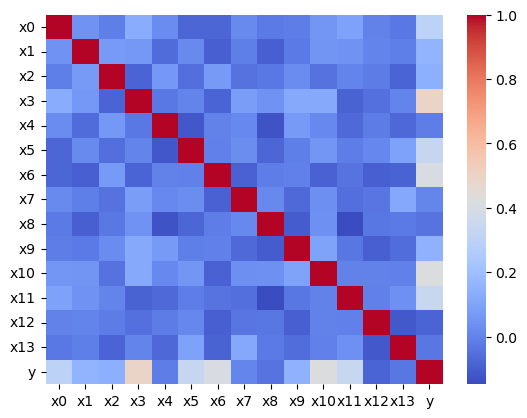

In [227]:
corr = df.corr(method='pearson')
# Mapa de calor sobre las ocrrelaciones entre variables
sns.heatmap(corr, cmap='coolwarm')

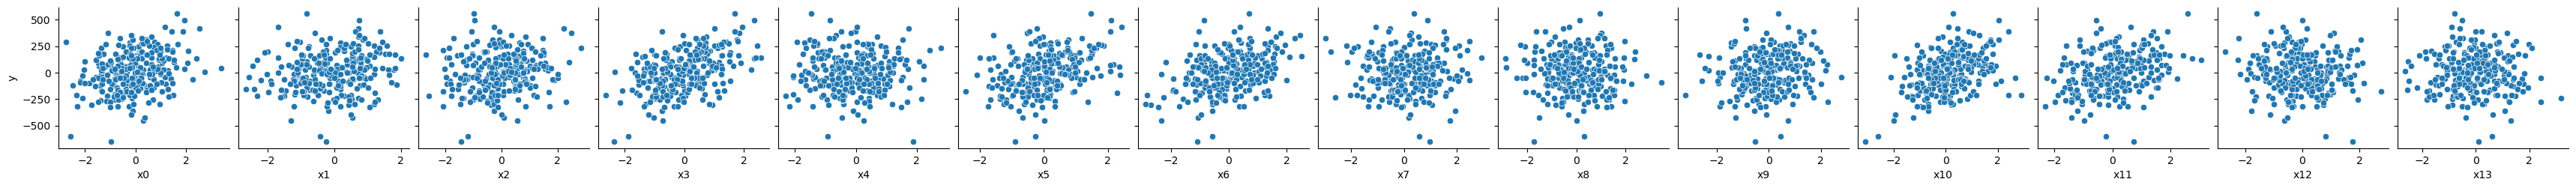

In [228]:
sns.pairplot(df, x_vars=columns[0:-1], y_vars=columns[-1])

Podríamos dividir nuestro conjunto en simplemente las primeras 200 observaciones para el conjunto de entrenamiento y las restantes 70 para el conjunto de validación, pero por introducir herramientas establecidas en la industria, generemos nuestros conjuntos de manera aleatoria sobre la muestra.

In [229]:
# Dividimos nuestro conjunto en validación y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=70/270, random_state=40)
df_train = pd.DataFrame(np.hstack((X_train,y_train[:, None])), columns=columns)
df_test = pd.DataFrame(np.hstack((X_test,y_test[:, None])), columns=columns)

Construimos el modelo de regresión lineal múltiple usando la muestra de entrenamiento.

In [230]:
from sklearn.linear_model import LinearRegression
# Regresión lineal habitual por mínimos cuadrados
reg_ls = LinearRegression().fit(X_train, y_train)

In [231]:
# evalúamos la función obtenida en la muestra de variables independientes reservada para test
y_test_pred = reg_ls.predict(X_test)

In [232]:
from sklearn.metrics import mean_squared_error, r2_score
# Coeficientes del modelo
print("Coeficientes: \n", reg_ls.coef_, "\n", "Intercepto: \n", reg_ls.intercept_)
# Error cuadrático medio sobre la muestra de test
print("Error cuadrático medio: %.2f" % mean_squared_error(y_test, y_test_pred))
# Coeficiente de determinación 1 significa predicción perfecta
print("Coeficiente de determinación R2: %.2f" % r2_score(y_test, y_test_pred))

Coeficientes: 
 [43.94602382 22.46183943 29.83640725 92.26844468 10.59352384 71.49254563
 97.85547196  3.45748611  9.52834508 15.67491137 72.3429387  73.63585407
  0.68818835 -0.58378327] 
 Intercepto: 
 2.6948483674190102
Error cuadrático medio: 464.45
Coeficiente de determinación R2: 0.99


La predicción es muy buena. Atendiendo a la matriz de correlaciones que mostramos más arriba, uno podría pensar que las variables 0, 2, 6,9 , 12, 13 (que presentan menor correlación con la variable objetivo $y$) podrían ser redundantes. 
Con la misma idea pero guiados por otro indicador, si atendemos a los coeficientes obtenidos para la regresión es claro que las variables 12 y 13 tienen un peso despreciable en el cáclulo de $y$, y por tanto podremos eliminarlas sin perder capacidad explicativa de la variable objetivo.

Podemos repetir la operación anterior excluyendo estas variables de una en una siguiendo algún criterio. También podríamos llevar a cabo, por ejemplo, un análisis de componentes principales y quedarnos con las componentes que necesitásemos para explicar la mayor parte de la varianza de la variable objetivo.

In [233]:
# Hagamos algo de análisis estadístico extra sobre la regresión lineal que se obtiene meidante la librería statsmodel
import statsmodels.api as sm
X2 = sm.add_constant(df_train[columns[0:-1]])
est = sm.OLS(y_train,X2) # ordinary least squares method for regression
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     1216.
Date:                Wed, 15 May 2024   Prob (F-statistic):          8.28e-174
Time:                        19:39:28   Log-Likelihood:                -877.72
No. Observations:                 200   AIC:                             1785.
Df Residuals:                     185   BIC:                             1835.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6948      1.506      1.789      0.0

Nótese que para este análisis más exhaustivo hemos tenido que volver a calcular los parámetros de la regresión para aprovechar la infraestructura que ofrece statsmodels (cuando ya habíamos empleado la clase LinearRegression de sklearn). Además este análisis es como "matar moscas a cañonazos", puesto que por el momento no nos vamos a fijar mucho más que en los $R^2$, los coeficientes y los p-valores.

Atendiendo a la columna P>|t| (mayor valor implica menor significatividad estadística) de nuevo podemos observarque las variables x13 (x12 en el df) y x14 (x13 en el df) son las candidatas de no ser significativas.

In [236]:
tol = 1
# comenzamos considerando todas las variables
x_columns = columns[0:-1]
idx = np.argwhere(est2.pvalues == max(est2.pvalues))[0][0]
iter = 0
removed_var = []
while tol > 1e-2 and idx != 0:    
    iter += 1
    removed_var.append(x_columns[idx-1])
    x_columns.remove(x_columns[idx-1])    
    X2 = sm.add_constant(df_train[x_columns])
    est_aux = sm.OLS(y_train,X2).fit()
    idx = np.argwhere(est_aux.pvalues == max(est_aux.pvalues))[0][0]
    tol = abs(max(est_aux.pvalues) - min(est_aux.pvalues))
print("Variables eliminadas:", removed_var)
print("Variables significativas:", x_columns)
print(est_aux.summary())    

Variables eliminadas: ['x13', 'x12']
Variables significativas: ['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1430.
Date:                Wed, 15 May 2024   Prob (F-statistic):          7.19e-177
Time:                        19:41:25   Log-Likelihood:                -877.95
No. Observations:                 200   AIC:                             1782.
Df Residuals:                     187   BIC:                             1825.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      

A continuación, sobre las variables ya determinadas como significativas: ridge, lasso y red elástica, a través de sklearn.

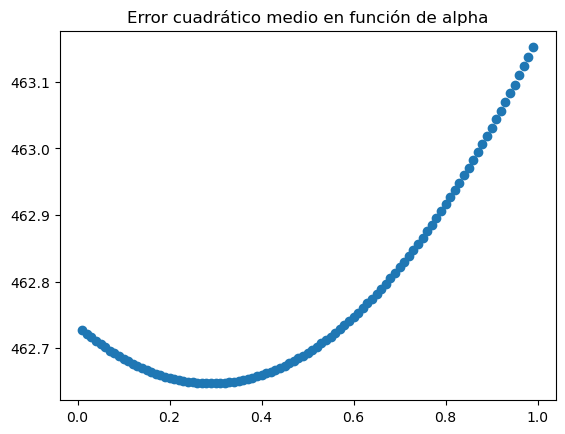

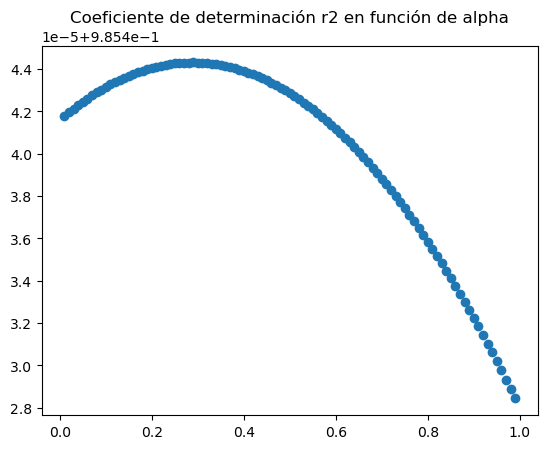

In [249]:
"""Ridge linear regression depending on alpha"""
from sklearn.linear_model import Ridge
def ridge_test(alpha_list):
    ridge_mean_error = []
    ridge_r2 = []
    for a in alpha_list:
        Ridge_aux = Ridge(alpha=a).fit(df_train[x_columns], y_train)
        y_pred = Ridge_aux.predict(df_test[x_columns])
        ridge_mean_error.append(mean_squared_error(y_test,y_pred))
        ridge_r2.append(r2_score(y_test,y_pred))    
    f, ax = plt.subplots()
    ax.scatter(alpha_list, ridge_mean_error)
    ax.set_title('Error cuadrático medio en función de alpha')
    plt.show()
    f, ax = plt.subplots()
    ax.scatter(alpha_list, ridge_r2)
    ax.set_title('Coeficiente de determinación r2 en función de alpha')
    plt.show()
    return ridge_mean_error, ridge_r2
mean_error, r2_values = ridge_test(np.arange(0.01,1,0.01))

De las gráficas anteriores se observa un mínimo en cuanto a error y máximo en cuanto a $R^2$ en torno a $alpha=0.3$, pero podemos determinarlo de manera numérica (lógicamente, el valor de alpha que minimiza el error cuadrático medio también maximiza el coeficiente de determinación, así que sería suficiente con hallar el extremo de la curva $R^2(\alpha)$ para obtener un valor óptimo, al menos localmente).

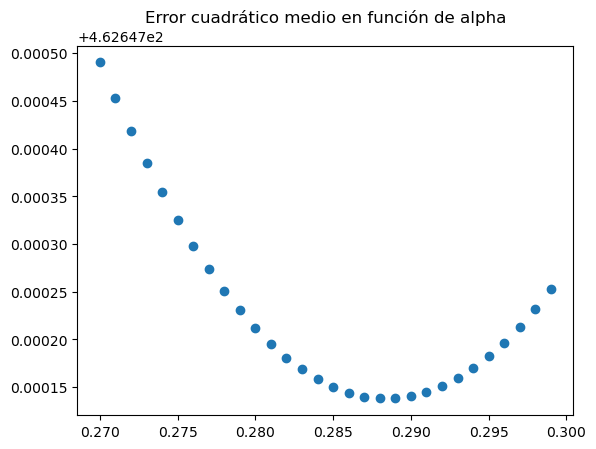

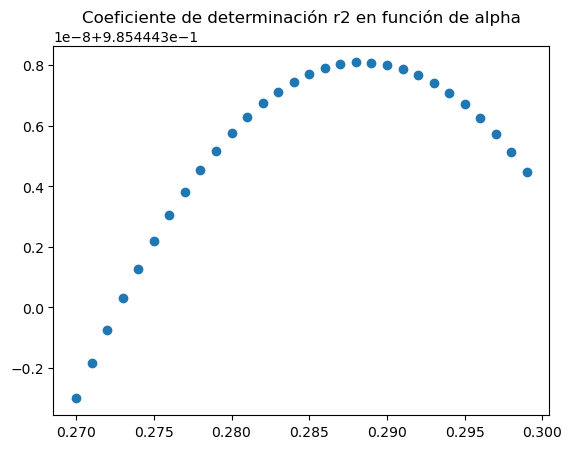

In [255]:
# hagamos zoom en torno a la zona óptima
mean_error, r2_values = ridge_test(np.arange(0.27,0.30,0.001))

In [271]:
idx_optim = np.argwhere(r2_values == max(r2_values))[0][0]
print("El valor alpha óptimo es: {:.4f}".format((np.arange(0.27,0.30,0.001))[idx_optim]))
print("El R2 para la regresión de Ridge y alpha óptimo es: {:.4f}".format(r2_values[idx_optim]))
print("El error cuadrático medio para la regresión de Ridge y alpha óptimo es: {:.2f}".format(mean_error[idx_optim]))

El valor alpha óptimo es: 0.2880
El R2 para la regresión de Ridge y alpha óptimo es: 0.9854
El error cuadrático medio para la regresión de Ridge y alpha óptimo es: 462.65
